In [89]:
from qutip import * 
import numpy as np
import matplotlib.pyplot as plt

In [90]:
Nph = 80

om_c = 1.
om_q = 1.
g = .2
gamma = .2
kappa = .04

a = tensor(destroy(Nph), qeye(2))
sigma = tensor(qeye(Nph), destroy(2))

H = om_c*a.dag()*a + om_q*sigma.dag()*sigma + g*( sigma*a.dag() + sigma.dag()*a )

evals,evecs = H.eigenstates(sort='low')

In [91]:
iter_omL = 1
omL0 = 1.
domL = (1.5-omL0)/iter_omL

iter_I = 11
I0 = 0.01
dI = (.4 - I0)/iter_I

mat_N_avg = []
arr_omL = []

for n_omL in range(iter_omL):
    omL = omL0 + n_omL*domL
    arr_N_avg = []
    arr_I = []
    for n_I in range(iter_I):
        I = I0 + n_I*dI

        Hdriven = H - omL*( a.dag()*a + sigma.dag()*sigma ) + I*( a + a.dag() )
        rho_ss = steadystate(Hdriven, [np.sqrt(gamma/2.)*a,np.sqrt(kappa/2.)*sigma])
        
        arr_N_avg.append( np.abs(expect( a, rho_ss)) )
        arr_I.append(I)
    arr_omL.append(omL)
    mat_N_avg.append( np.asarray(arr_N_avg) )
      


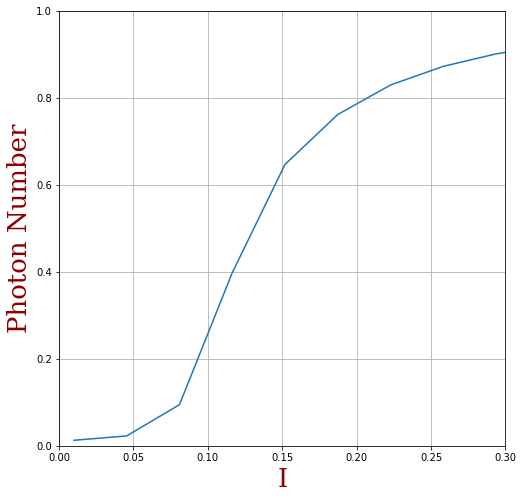

In [94]:
plt.figure(figsize=(8,8))
plt.plot( arr_I, gamma/4.*np.divide(mat_N_avg[0], arr_I)  )
plt.grid()
plt.axis([0, .3, 0, 1])
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('I', fontdict=font)
plt.ylabel('Photon Number', fontdict=font)
plt.show()


(1, 51) (1, 51) (1, 51)


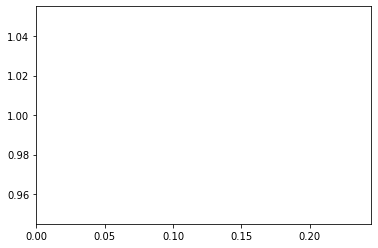

In [71]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Y = np.asarray(arr_omL)
X = np.asarray(arr_I)
X, Y = np.meshgrid(X, Y)
Z = np.asarray(mat_N_avg)
print(X.shape, Y.shape, Z.shape)

plt.pcolor(X, Y, Z)
plt.show()

# Plot the surface.
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(0.0, 10.)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

#plt.show()


In [ ]:
 """    
        #Wigner function
        x_vec = np.arange(-5,5,.1)
        y_vec = x_vec
        Wf = wigner(rho_ph, x_vec, y_vec )
        wtitle = "wdata_%d" % countw
        p_w = open("data/wigner/%s.dat" % (wtitle), "w")
        nx = 0
        for x in x_vec:
            ny = 0
            for y in y_vec:
                p_w.write("%f %f %f\n" % (x, y, Wf[nx,ny]) )
                ny += 1
            p_w.write("\n")
            p_w.flush()
            nx += 1
        p_w.close()
        """
        
        
        #Spin Q fun
        n_sample = 40.
        phi_vec = np.arange(-np.pi, np.pi+2*np.pi/100., 2*np.pi/n_sample )
        theta_vec = np.arange(0, np.pi+np.pi/100., np.pi/n_sample )
        stitle = "sdata_%d" % countw
        p_s = open("data/wigner/%s.dat" % (stitle), "w")
        for theta in theta_vec:
            for phi in phi_vec:
                state_n = spin_coherent(1./2., theta, phi, type='ket')
                Qfun = expect( rho_s, state_n ) 
                p_s.write("%f %f %f\n" % (phi, theta, Qfun.real))
                p_s.flush()
            p_s.write("\n")
            p_s.flush()
            
"""
plt.figure(figsize=(8,8))
plt.plot( arr_I, N_avg  )
plt.grid()
#plt.axis([0, range(M), 0, 10])
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('I', fontdict=font)
plt.ylabel('Photon Number', fontdict=font)
plt.show()
"""